In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5,CG,"love this! well made, sturdy, and veri comfort..."
1,1,Home_and_Kitchen_5,5,CG,"love it, a great upgrad from the original. i'v..."
2,2,Home_and_Kitchen_5,5,CG,thi pillow save my back. i love the look and f...
3,3,Home_and_Kitchen_5,1,CG,"miss inform on how to use it, but it is a grea..."
4,4,Home_and_Kitchen_5,5,CG,veri nice set. good quality. we have had the s...


In [3]:
cols = df.columns
cols[0]

'Unnamed: 0'

In [4]:
df = df.drop(cols[0],axis=1)
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"love this! well made, sturdy, and veri comfort..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrad from the original. i'v..."
2,Home_and_Kitchen_5,5,CG,thi pillow save my back. i love the look and f...
3,Home_and_Kitchen_5,1,CG,"miss inform on how to use it, but it is a grea..."
4,Home_and_Kitchen_5,5,CG,veri nice set. good quality. we have had the s...


In [5]:
df['length'] = df['text_'].apply(len)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
 4   length    40432 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


,category,rating,label,text_,length
0,Home_and_Kitchen_5,5,CG,"love this! well made, sturdy, and veri comfort...",73
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrad from the original. i'v...",75
2,Home_and_Kitchen_5,5,CG,thi pillow save my back. i love the look and f...,64
3,Home_and_Kitchen_5,1,CG,"miss inform on how to use it, but it is a grea...",72
4,Home_and_Kitchen_5,5,CG,veri nice set. good quality. we have had the s...,84


(array([1.5206e+04, 1.0126e+04, 4.7350e+03, 2.7990e+03, 1.8180e+03,
        1.3440e+03, 1.0890e+03, 8.7300e+02, 7.3800e+02, 6.4300e+02,
        3.9000e+02, 3.1000e+02, 2.2800e+02, 1.0300e+02, 2.1000e+01,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([   3.  ,  135.85,  268.7 ,  401.55,  534.4 ,  667.25,  800.1 ,
         932.95, 1065.8 , 1198.65, 1331.5 , 1464.35, 1597.2 , 1730.05,
        1862.9 , 1995.75, 2128.6 , 2261.45, 2394.3 , 2527.15, 2660.  ]),
 <BarContainer object of 20 artists>)

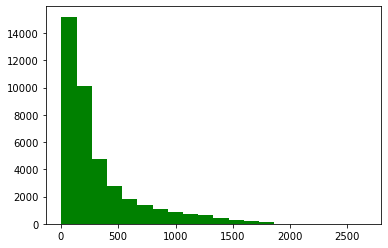

In [6]:
plt.hist(df['length'],bins = 20,color = 'green')

In [7]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
CG     288.749307  289.943288   3.0   90.0  165.0  361.0  1649.0  
OR     370.685002  389.662744  24.0  114.0  210.0  464.0  2660.0

In [8]:
# Extracting the largest review
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'weak on current science. after see it twice, i agre with much (but not all) of the posit five star reviews. out of respect for those who read reviews, i\'ll not repeat everyth that i like about the presentation. i found the goofi over earrings, hairdo, and facial hair arrang of daniel vitalis, (describ a a "wild food expert") distracting. ugh. ditto for david wolfe, who had an extrem goofi wild hairdo. on the other hand, jon gabriel, describ a an "author and weight loss expert" wa nice groom and a good presenter. hi stori of person transform of a fellow of over 400 pound (whew) to becom a jock of normal weight wa inspiring. christian northrup preserv her rank a one of america\' cutest doctors. a realli nice look woman! present by dr. mercola, jason vale, kri carr, alejandro junger were fine. it wa disappoint to have jami oliv (so popular in the uk) give babi cow growth fluid a pas with unscientif but popular idea on milk. none of the present had anyth (zilch) to say about the work of 

In [9]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [10]:
# Creating Bag of Words
bag_of_words = CountVectorizer()
bag_of_words.fit(df['text_'])
print("Vocabulary:",len(bag_of_words.vocabulary_))

Vocabulary: 38442


In [11]:
print(bag_of_words.vocabulary_)

{'love': 20756, 'this': 34277, 'well': 37261, 'made': 21043, 'sturdy': 32908, 'and': 2745, 'veri': 36473, 'comfortable': 8024, 'it': 18482, 'pretti': 26595, 'great': 15556, 'upgrad': 36130, 'from': 14441, 'the': 34131, 'original': 24386, 'had': 15942, 'mine': 22200, 'for': 14096, 'coupl': 8812, 'of': 24068, 'year': 38162, 'thi': 34226, 'pillow': 25716, 'save': 29710, 'my': 23043, 'back': 3980, 'look': 20656, 'feel': 13346, 'miss': 22361, 'inform': 17901, 'on': 24190, 'how': 17121, 'to': 34574, 'use': 36211, 'but': 6098, 'is': 18442, 'product': 26769, 'price': 26625, 'nice': 23486, 'set': 30382, 'good': 15303, 'quality': 27283, 'we': 37141, 'have': 16302, 'two': 35415, 'month': 22641, 'now': 23810, 'not': 23744, 'been': 4519, 'want': 36967, 'differ': 10466, 'flavor': 13791, 'they': 34220, 'are': 3153, 'perfect': 25364, 'touch': 34787, 'me': 21709, 'onli': 24208, 'thing': 34249, 'wish': 37667, 'littl': 20503, 'more': 22690, 'space': 31855, 'these': 34212, 'done': 11047, 'fit': 13700, 'sm

In [12]:
review = df['text_'][3]
review

'miss inform on how to use it, but it is a great product for the price! i'

In [13]:
bow_msg = bag_of_words.transform([review])
print(bow_msg)
print(bow_msg.shape)

  (0, 6098)	1
  (0, 14096)	1
  (0, 15556)	1
  (0, 17121)	1
  (0, 17901)	1
  (0, 18442)	1
  (0, 18482)	2
  (0, 22361)	1
  (0, 24190)	1
  (0, 26625)	1
  (0, 26769)	1
  (0, 34131)	1
  (0, 34574)	1
  (0, 36211)	1
(1, 38442)


In [14]:
print(bag_of_words.get_feature_names()[6098])
print(bag_of_words.get_feature_names()[15556])

but
great


In [15]:
bow_transformed_reviews = bag_of_words.transform(df['text_']) 

In [16]:
print("Bag of words transformed review corpus shape: ", bow_transformed_reviews.shape)
print("Non-zero values in the bag of words model:",bow_transformed_reviews.nnz)

Bag of words transformed review corpus shape:  (40432, 38442)
Non-zero values in the bag of words model: 1653869


In [17]:
tfidf_transformer = TfidfTransformer().fit(bow_transformed_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg)
print(bow_msg)

  (0, 6098)	1
  (0, 14096)	1
  (0, 15556)	1
  (0, 17121)	1
  (0, 17901)	1
  (0, 18442)	1
  (0, 18482)	2
  (0, 22361)	1
  (0, 24190)	1
  (0, 26625)	1
  (0, 26769)	1
  (0, 34131)	1
  (0, 34574)	1
  (0, 36211)	1


In [18]:
tfidf_reviews = tfidf_transformer.transform(bow_transformed_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40432, 38442)
No. of Dimensions: 2
